# Descriptive statistics and normality testing

## Imports

In [1]:
import pandas as pd
import scipy.stats as ss
import seaborn as sb
import statsmodels.api as sm

## Data loading

In [2]:
file_name = "../data/toy_descriptive_long.csv"
df = pd.read_csv(file_name)
df.head()

,group,value
0,S1,3
1,S1,3
2,S1,3
3,S1,4
4,S1,4


## Tabular analysis

- The `DataFrame` class from `pandas` provides the `describe` method for computing basic descriptive statistics.
- `describe` will ignore non-numeric columns

In [4]:
df.describe()

,value
count,45.000000
mean,7.600000
std,5.824712
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,26.000000


The previous code has computed the statistics for the whole group. 
But we really want to break compute values by group.
We can "subset" our data as follows.

In [5]:
df[df["group"] == "S2"]

,group,value
15,S2,1
16,S2,1
17,S2,2
18,S2,2
19,S2,2
20,S2,3
21,S2,4
22,S2,5
23,S2,5
24,S2,6


The previous code gives us the subset of data from group S2.
Now we can run `describe` on that data.

In [6]:
df[df["group"] == "S2"].describe()

,value
count,15.000000
mean,7.600000
std,7.258493
min,1.000000
25%,2.000000
50%,5.000000
75%,12.500000
max,21.000000


If we want to describe for all groups we can use the `groupby` method.

In [7]:
df.groupby(by="group").describe()

value                                          
      count mean       std  min  25%  50%   75%   max
group                                                
S1     15.0  7.6  7.238784  3.0  4.0  5.0   7.0  26.0
S2     15.0  7.6  7.258493  1.0  2.0  5.0  12.5  21.0
S3     15.0  7.6  1.242118  5.0  7.0  8.0   8.5   9.0

## Basic plots

### Plotting data points

<Axes: xlabel='group', ylabel='value'>

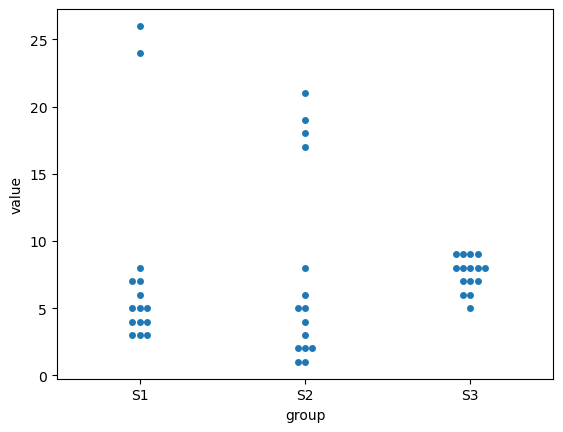

In [9]:
sb.swarmplot(df, x="group", y="value")

### Boxplots of the data distribution

<Axes: xlabel='group', ylabel='value'>

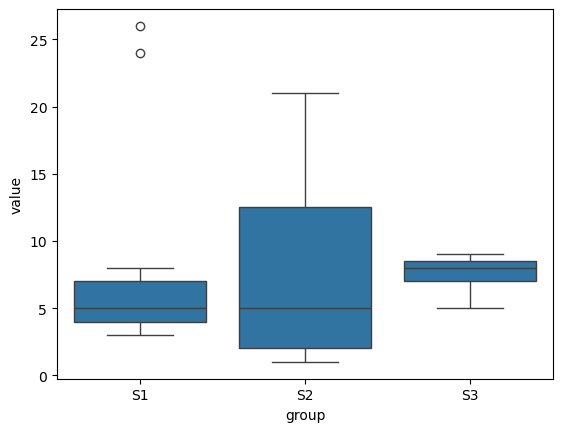

In [10]:
sb.boxplot(
    df,
    x="group",
    y="value",
)

### Interval plots

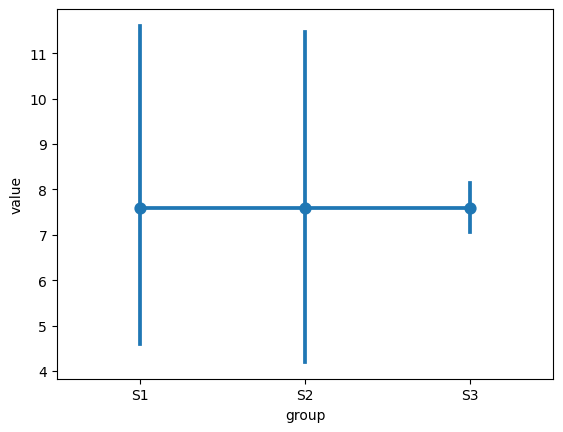

In [11]:
ax = sb.pointplot(
    df,
    x="group",
    y="value",
)

We need to get rid of the line connecting the groups.

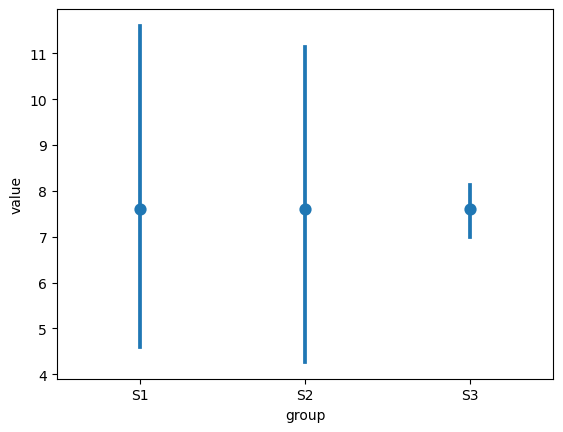

In [12]:
ax = sb.pointplot(
    df,
    x="group",
    y="value",
    linestyles="none",
)

By default we are getting the mean and standard devation.
Let's change to the median and IQR.
We will also add some horizontal bars to the ends of the range.

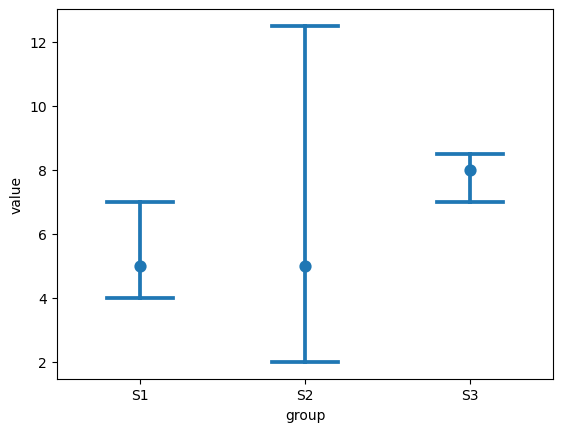

In [13]:
ax = sb.pointplot(
    df,
    x="group",
    y="value",
    capsize=0.4,
    estimator="median",
    errorbar=("pi", 50),
    linestyles="none",
)

## Combining plots

We can combine different types of plots.
Let's start by adding the data points to our boxplot.

Text(46.972222222222214, 0.5, 'Weight (g)')

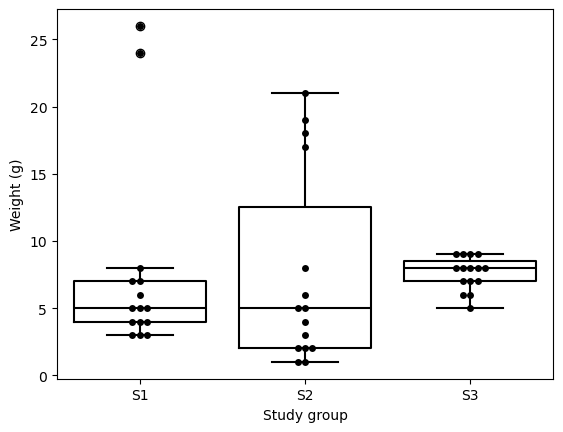

In [15]:
ax = sb.swarmplot(
    df,
    x="group",
    y="value",
    color="k",
)
ax = sb.boxplot(
    df,
    ax=ax,
    x="group",
    y="value",
    fill=False,
    color="k",
)
ax.set_xlabel("Study group")
ax.set_ylabel("Weight (g)")

We can do the same thing with our interval plots.

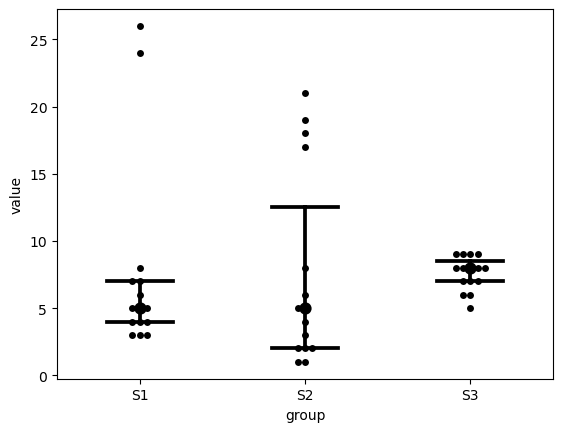

In [16]:
ax = sb.swarmplot(df, x="group", y="value", color="k")
ax = sb.pointplot(
    df,
    ax=ax,
    x="group",
    y="value",
    capsize=0.4,
    color="k",
    estimator="median",
    errorbar=("pi", 50),
    linestyle="none",
)

### Histograms

Pandas DataFrames can plot histograms with the built in `hist` method.

array([[<Axes: title={'center': 'S1'}>, <Axes: title={'center': 'S2'}>],
       [<Axes: title={'center': 'S3'}>, <Axes: >]], dtype=object)

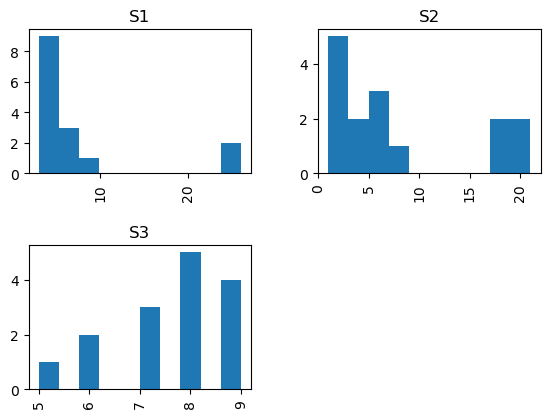

In [18]:
df.hist(by="group")

The default is pretty ugly.
We can lay things out one row and fix the figure size.

array([<Axes: title={'center': 'S1'}>, <Axes: title={'center': 'S2'}>,
       <Axes: title={'center': 'S3'}>], dtype=object)

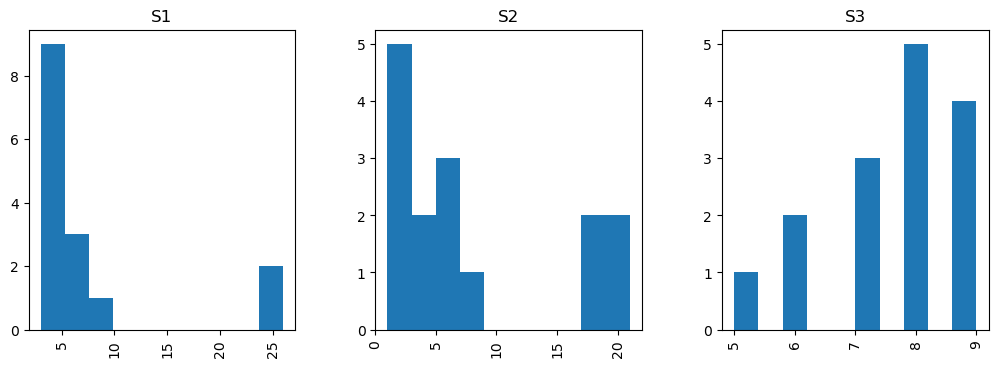

In [19]:
df.hist(by="group", figsize=(12, 4), layout=(1, 3))

While `pandas` has basic plotting support, `seaborn` is a lot more powerful.
Let's do the same thing in `seaborn`.

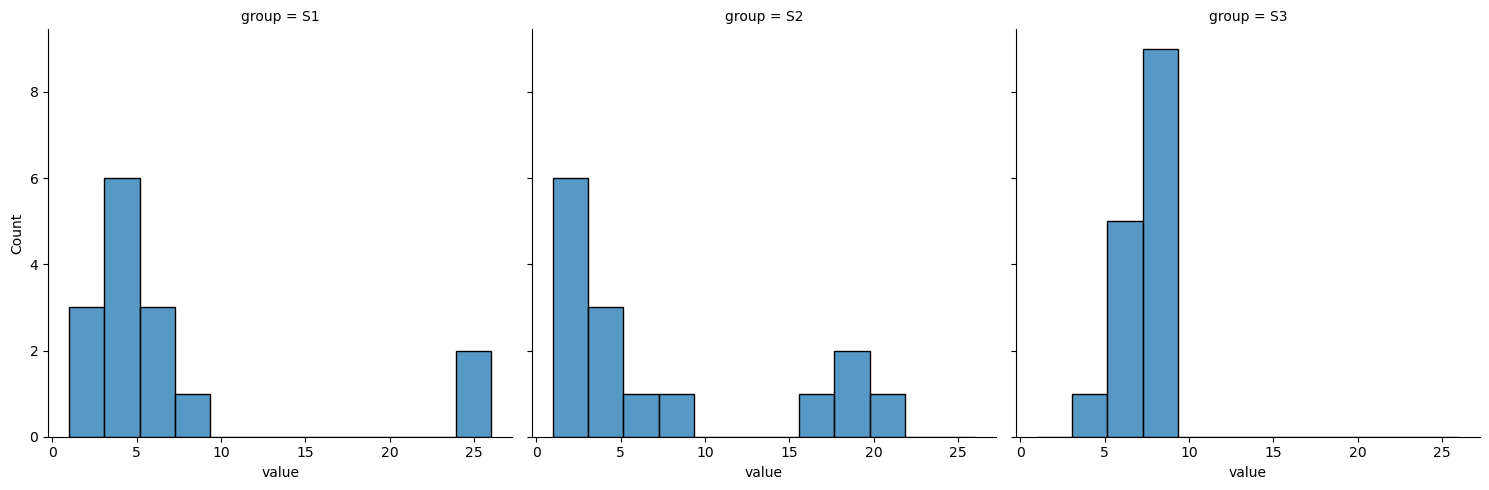

In [20]:
sb.displot(df, x="value", col="group")

The `distplot` function is a bit different than what we saw earlier, in that it produces multiple plots.
Instead of producing a single `Axes` object it produces a collection of `Axes` stored in a new object called a `FacetGrid`.
Let's clean up this plot.

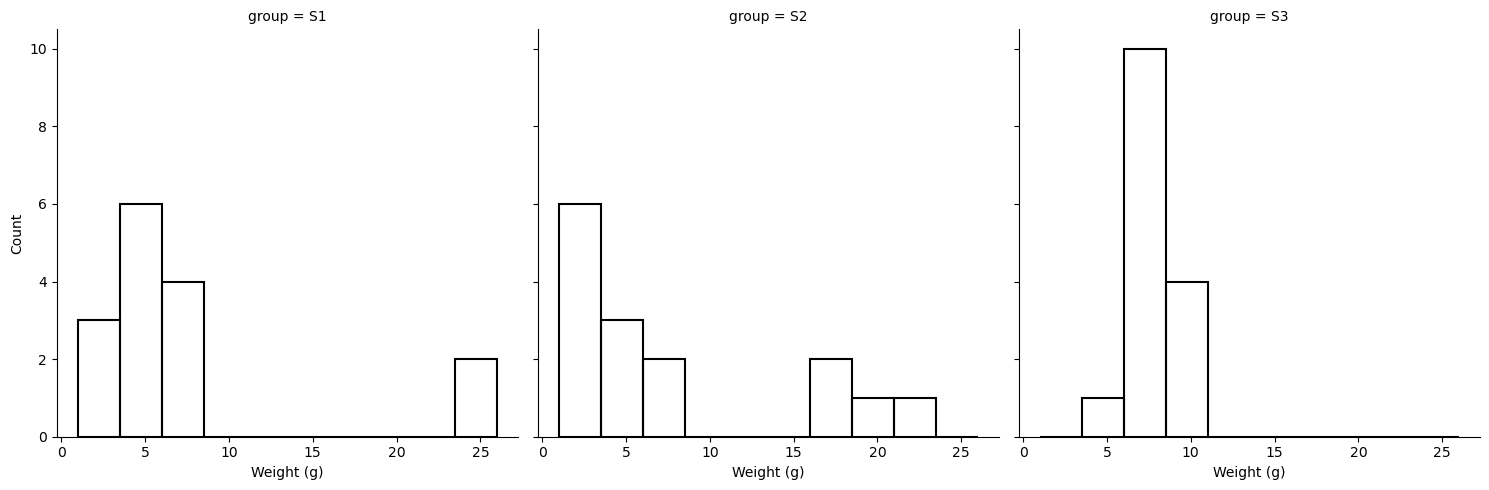

In [21]:
fg = sb.displot(df, x="value", col="group", bins=10, color="k", fill=False)
fg.set_xlabels("Weight (g)")

## Normality testing

We will use the `scipy.stats` module which provides a large collection of statistical functions.
To compute the Shapiro-Wilks statistics we will use the `shapiro` function.
This functions takes in a sequence of numbers.

In [22]:
ss.shapiro(df["value"])

ShapiroResult(statistic=np.float64(0.7857539980697994), pvalue=np.float64(1.172984501689435e-06))

Again this is computing for the whole dataset.
We would rather do it by group.
So let's use the `groupby` method.

In [23]:
df.groupby(by="group")["value"].apply(ss.shapiro)

group
S1    (0.6117803189868447, 3.273127309208296e-05)
S2     (0.7925495624837879, 0.002954607401474201)
S3        (0.8958448205936224, 0.082253168823215)
Name: value, dtype: object

We don't need the test statistics.
Also let's round to 3 decimals.

In [24]:
df.groupby(by="group")["value"].apply(lambda x: round(ss.shapiro(x)[1], 3))

group
S1    0.000
S2    0.003
S3    0.082
Name: value, dtype: float64

If we want to do QQ plots we will use `statsmodels`.
There is not a really nice way to do it by group, so we will manually subset.

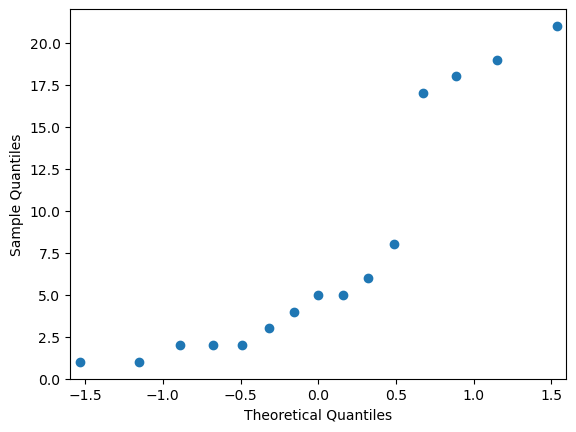

In [25]:
sm.qqplot(df.loc[df["group"] == "S2", "value"]);

By default `qqplot` does not show any line.
We will add the one fit to the quantiles.

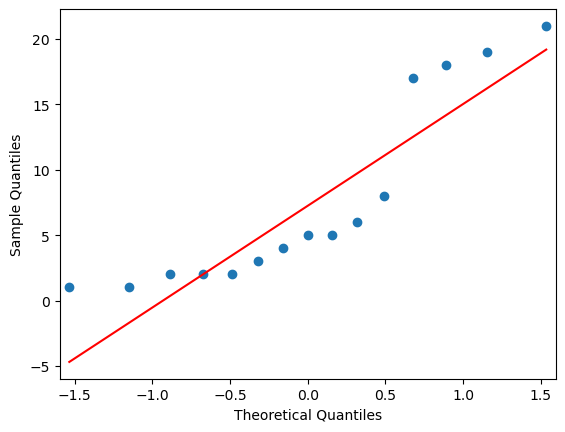

In [28]:
sm.qqplot(df.loc[df["group"] == "S2", "value"], line="q");